Assignment 4

## GitHub User Name: aton-physics

## Email: andrew_ton@brown.edu


## Problem 1
To convert the Schrodinger equation from second to first order, we trade the second order equation for two first order equations, given below.

$\frac{d\psi}{dx} = \phi$

$\frac{d\phi}{dx} = \frac{2m}{\hbar^2}[V(x) - E]\psi$

We will solve this using the shooting method with a root finding algorithm to find the ground state energy and the next nine excited states.


We use the potential $V(x) = V_o\frac{x^2}{a^2}$ where $V_o = 50 eV, a = 10^{-11} m$

I introduce the fundamental frequency $\sqrt{\frac{2V_o}{m}}\frac{1}{a}$ to simplify the computation.

In [6]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import rootfinder as rtf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [42]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        return x*x

In [8]:
# the matching function
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

Energy found: 0.70711
Energy found: 2.12132
Energy found: 3.53553
Energy found: 4.94975
Energy found: 6.36396
Energy found: 7.77817
Energy found: 9.19239
Energy found: 10.60660
Energy found: 12.02082
Energy found: 13.43503


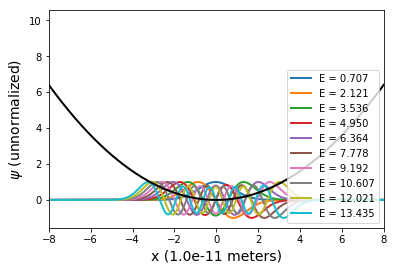

Energy is given in units of $\hbar\omega/2 = 1$ where \omega = \sqrt{2V_o/m}/a


In [43]:
a = 1
E1 =  0 # start Energy search at the well depth
dE = 0.01
npoints = 1000
m = 9.1094e-31     # Mass of electron
frequency = (2*50/m)**(1/2)/1.0e-11
hbar = 1.0546e-34  # Planck's constant over 2*pi
scalefactor = hbar/2*frequency

E_SM = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 13.5):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE

# Solution is exact only for for wide and deep well, and odd n 
'''a = 5
V0 = 10
n = np.arange(1,5,2)
Exact = -V0+np.pi**2/2/a**2*n**2
print(Exact)'''

# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
ax.set_xlim([-8, 8])
ax.set_xlabel('x (1.0e-11 meters)', fontsize = 14)
ax.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
ax.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()
print("Energy is given in units of $\hbar\omega/2 = 1$ where \omega = \sqrt{2V_o/m}/a")

In [22]:
for i in range(9):
    print(E_SM[i] - E_SM[i+1])
print("we see that the spacing is the same within numerical accuracy")

-1.4142135484603915
-1.4142134978463634
-1.4142136290602396
-1.4142135768707398
-1.4142135656980344
-1.4142135741957507
-1.4142135365317792
-1.414213608861946
-1.414213541388257
we see that the spacing is the same within numerical accuracy


part b) Add a quartic term $V(x) = V_ox^2/a^2 + V_o'x^4/a^4$ where $V_o' = 0.1V_o = 5 eV$

Plot level number vs energy for both the harmonic and anharmonic oscillator on the same graph. How does energy vary with level number for each case?

In [45]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        return x**2+0.25*x**4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


Energy found: 0.78259
Energy found: 2.46730
Energy found: 4.35968
Energy found: 6.41256
Energy found: 8.60017
Energy found: 10.90541
Energy found: 13.31587
Energy found: 15.82207
Energy found: 18.41643
Energy found: 21.09276
Energy found: 23.84587


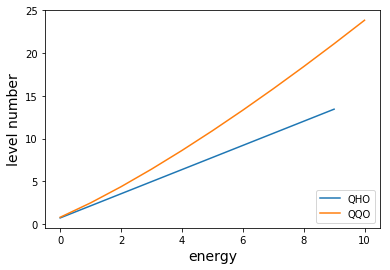

In [46]:
a = 1
E1 =  0 # start Energy search at the well depth
dE = 0.1
npoints = 1000

E_SM2 = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 24):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM2.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        #ax.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE
    
# plot the potential
ax.plot(E_SM,label = "QHO")
ax.plot(E_SM2,label = "QQO")
ax.set_xlabel('energy', fontsize = 14)
ax.set_ylabel('level number', fontsize = 14)
ax.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()

QHO = Quantum Harmonic Oscillator, QQO = Quantum Anharmonic Oscillator

It is clear that the QHO energy varies linearly with level number. Meanwhile, the QQO energy seems to have curvature to it, making the level dependence on energy super-linear. This means the energy difference between adjacent 
levels varies as level number increases.

part c) Calculate the wavefunctions of the anharmonic oscillator for the three lowest energy states and plot them all on the same axes as a function of x from -5a to 5a. Don't normalize - just scale.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


Energy found: 0.78259
Energy found: 2.46730
Energy found: 4.35968


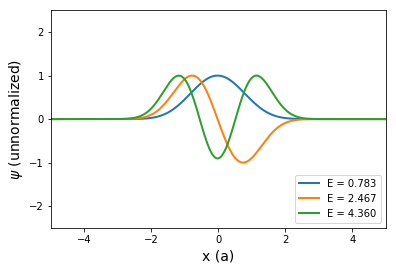

In [48]:
a = 1
E1 =  0 # start Energy search at the well depth
dE = 0.1
npoints = 1000

E_SM2 = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < 5):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM2.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        #plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE
    
# plot the potential
ax.plot(xa, color = 'k', lw =2)
ax.set_xlim([-5, 5])
ax.set_ylim([-2.5,2.5])
ax.set_xlabel('x (a)', fontsize = 14)
ax.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
ax.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()


## Problem 2
a) Use the Jacobi method, compute electric potential between infinitely long concentric square cylinders. Let cylinders have sides 5.0 and 25.0. Assume inner conductor is held at V = 1, outer at V = 0. Use grid spacing of 1. Make a contour plot of the potential and some 1-D slices across rows of the grid.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


In [3]:
def free_space(phi): return phi

def parallel_plate(phi):
    """ 
    define parallel plate potential
    """
   # the operator // is floor division i.e divide and then round down to nearest integer.
   # Using this ensures that the result is an integer so we can use it to index arrays.
    
    n, m = np.shape(phi)
    w = n//2
    h = n//3  # span 1/3 of grid in height`
    
    right = w + h//2 #position of plate 1
    left = w - h//2  # positioin of plate 2
    phi[h:2*h, left] = - 1
    phi[h:2*h, right] =  1
    
    return phi

def box():
    # define boundary conditions for a box
    
    return phi

def pipe(phi):
    n,m = np.shape(phi)
    r = n/200
    tol = np.sqrt(n**2 + m**2)

    #meshgrid is a simple way to define a set of coordinates (a simple matrix containing x y coordinates) (x1,y1), (x2,y2),... and also downward.
    X,Y = np.meshgrid(range(-n//2, n//2+1), range(-m//2, m//2+1))
    #if you want to compute a function on a grid, this is probably the way to do it
    Z = np.sqrt((X-n//8)**2 + (Y)**2)
    #this is a circle in a square space
    
    idx = np.nonzero(abs(Z-r) < 1)
    phi[idx] =  1
    return phi



In [4]:
def invDel2_5(b, boundary,  dx=1.0, converge = 1e-6):
    #b is the charge term
    """ This is the Jacobi algorithim 
    Specialized to two dimensions so that plotting is easier.
    """
    V = boundary(np.zeros(b.shape, float))  # potential values at step n of the iteration   
    Vnew = np.zeros(b.shape, float) # updated potential 
    Npoints = len(b.flatten())

    t = 0  # transient before checking for convergence
    dV = converge*10  #make sure we run through transient
    
    while(dV > converge): 
        # also does some checking
        # this update fixes V along edges = 0
        # faster to use numpy than to use loops: array slicing
        # don't use for loops if you have numpy arrays
        Vnew[1:-1, 1:-1] = (V[1:-1,2:] + V[1:-1,:-2] + V[2:,1:-1] \
                + V[:-2,1:-1] - (dx*dx)*b[1:-1,1:-1])/4
        
        # enforce the boundary conditions at every update
        Vnew = boundary(Vnew)
        
        # wait for transient before checking convergence
        if t > 100 : 
            dV = np.sum(abs(Vnew - V))/Npoints
        
        # Note the explicit indexing (V[:,:]) without it Vnew will be updated with V
        V[:,:] = Vnew 
        # for mor complex objects i.e. list with sublists use deepcopy
        t+=1
   
    return Vnew

b) Compute electric potential and field for pt charge at center of a parallel plate capacitor in 2d. Make a contour plot of potential and field. Study how equipotential contours are affected by proximity of the charge to one of the capacitor plates.